In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
df=pd.read_csv('Successful_Startups.csv')

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,Season,Profit
0,165349.20,136897.80,471784.10,Season1,192261.83
1,162597.70,151377.59,443898.53,Season2,191792.06
2,153441.51,101145.55,407934.54,Season3,191050.39
3,144372.41,118671.85,383199.62,Season1,182901.99
4,142107.34,91391.77,366168.42,Season3,166187.94


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Season           50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
df.shape

(50, 5)

In [27]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [28]:
df['Season'].describe()

,Season
count,50
unique,3
top,Season1
freq,17


In [29]:
x=df.iloc[:,:-1]

In [30]:
y=df.iloc[:,-1:]

In [31]:
x.head()

,R&D Spend,Administration,Marketing Spend,Season
0,165349.20,136897.80,471784.10,Season1
1,162597.70,151377.59,443898.53,Season2
2,153441.51,101145.55,407934.54,Season3
3,144372.41,118671.85,383199.62,Season1
4,142107.34,91391.77,366168.42,Season3


In [32]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [34]:
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')

In [35]:
x=np.array(ct.fit_transform(x))

In [36]:
print(x)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [0.0000000e+00 1.000

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [41]:
reg.fit(X_train,Y_train)

LinearRegression()

In [43]:
y_pre=reg.predict(X_test)

In [44]:
y_pre

array([[103015.20159798],
       [132582.27760814],
       [132447.73845174],
       [ 71976.0985126 ],
       [178537.48221049],
       [116161.24230162],
       [ 67851.69209677],
       [ 98791.7337469 ],
       [113969.4353301 ],
       [167921.06569546]])

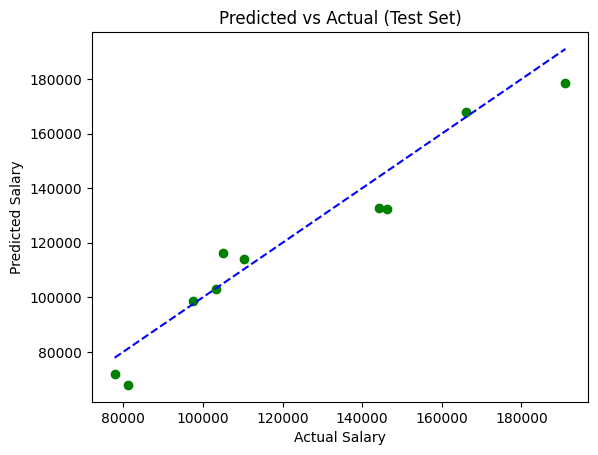

In [45]:
y_test_pred = reg.predict(X_test)

plt.scatter(Y_test, y_test_pred, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='blue', linestyle='--')
plt.title('Predicted vs Actual (Test Set)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [58]:
d=pd.read_csv('Corn_Yield.csv')

In [59]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fertilizer Used  20 non-null     float64
 1   Corn Yield       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [60]:
d.head()

,Fertilizer Used,Corn Yield
0,0.00,10.99
1,5.26,12.69
2,10.53,19.99
3,15.79,30.25
4,21.05,38.01


In [81]:
x=d.iloc[:,:-1]
y=d.iloc[:,-1:]

In [82]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [83]:
reg.fit(x,y)

LinearRegression()

In [86]:
from sklearn.preprocessing import PolynomialFeatures

pf=PolynomialFeatures(degree=2)
x_p= pf.fit_transform(x)

re = linear_model.LinearRegression()

re.fit(x_p,y)

LinearRegression()

In [73]:
print(x_p)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 5.2600000e+00 2.7667600e+01]
 [1.0000000e+00 1.0530000e+01 1.1088090e+02]
 [1.0000000e+00 1.5790000e+01 2.4932410e+02]
 [1.0000000e+00 2.1050000e+01 4.4310250e+02]
 [1.0000000e+00 2.6320000e+01 6.9274240e+02]
 [1.0000000e+00 3.1580000e+01 9.9729640e+02]
 [1.0000000e+00 3.6840000e+01 1.3571856e+03]
 [1.0000000e+00 4.2110000e+01 1.7732521e+03]
 [1.0000000e+00 4.7370000e+01 2.2439169e+03]
 [1.0000000e+00 5.2630000e+01 2.7699169e+03]
 [1.0000000e+00 5.7890000e+01 3.3512521e+03]
 [1.0000000e+00 6.3160000e+01 3.9891856e+03]
 [1.0000000e+00 6.8420000e+01 4.6812964e+03]
 [1.0000000e+00 7.3680000e+01 5.4287424e+03]
 [1.0000000e+00 7.8950000e+01 6.2331025e+03]
 [1.0000000e+00 8.4210000e+01 7.0913241e+03]
 [1.0000000e+00 8.9470000e+01 8.0048809e+03]
 [1.0000000e+00 9.4740000e+01 8.9756676e+03]
 [1.0000000e+00 1.0000000e+02 1.0000000e+04]]


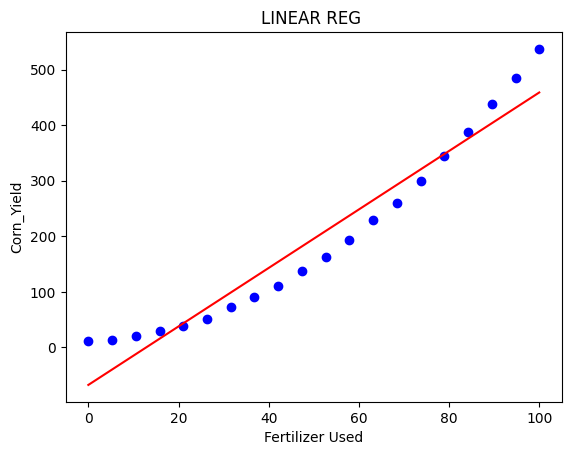

In [70]:
plt.scatter(x,y,color='blue')
plt.plot(x,reg.predict(x),color='red')
plt.title('LINEAR REG ')
plt.xlabel('Fertilizer Used')
plt.ylabel('Corn_Yield')
plt.show()

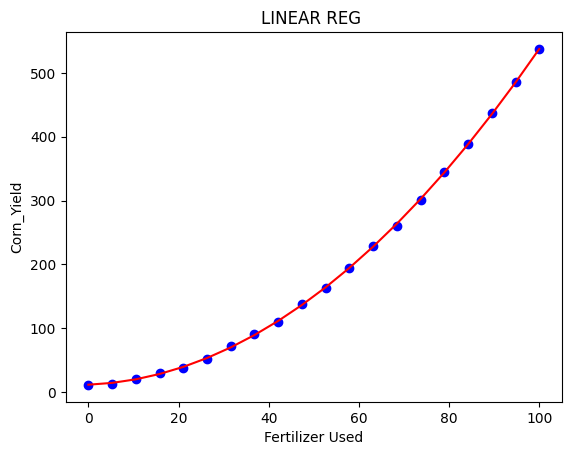

In [79]:
plt.scatter(x,y,color='blue')
plt.plot(x,re.predict(x_p),color='red')
plt.title('LINEAR REG ')
plt.xlabel('Fertilizer Used')
plt.ylabel('Corn_Yield')
plt.show()

In [84]:
reg.predict([[6.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-33.19744314]])

In [89]:
re.predict(pf.fit_transform([[6.5]]))

array([[15.23318722]])